# Example: The indenter

This is the punch benchmark, that simulates pure plasticity for which exists an exact analytical solution. In this problem, a rigid punch indents a rigid plastic half space. 

In [5]:
import numpy as np
import matplotlib.pyplot as plt

(-0.05, 1.05, -0.53, 0.13)

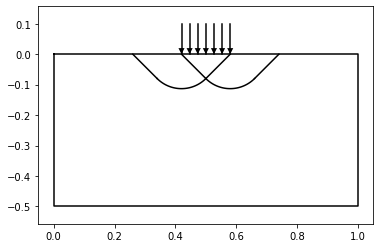

In [6]:
def analytical_punch(color):
    
    xa = 0.5 - 0.08
    xb = 0.5 + 0.08
    xc = 0.5
    plt.plot([xa,xc],[0.0,-0.08],color)
    plt.plot([xb,xc],[0.0,-0.08],color)
    xa = 0.5 - 3*0.08
    xb = 0.5 + 3*0.08
    plt.plot([xa,xa+0.08],[0.0,-0.08],color)
    plt.plot([xb,xb-0.08],[0.0,-0.08],color)

    ang = np.linspace(0,np.pi/2,100) + np.pi - np.pi/4
    r = 2*0.08/np.sqrt(2)
    xcirc = np.sin(ang)*r + 0.5 - 0.08
    ycirc = np.cos(ang)*r
    plt.plot(xcirc,ycirc,color)
    xcirc = np.sin(ang)*r + 0.5 + 0.08
    ycirc = np.cos(ang)*r
    plt.plot(xcirc,ycirc,color)
    

for xp in np.linspace(0.5-0.08,0.5+0.08,7):
    plt.plot([xp,xp],[0,0.1],"k")
    plt.fill([xp,xp+0.01,xp-0.01],[0,0.02,0.02],"k")
    
analytical_punch("k")  

plt.plot([0,1,1,0,0],[0,0,-0.5,-0.5,0],"k")

plt.axis("equal")

dx: 0.005000, dz: 0.005000


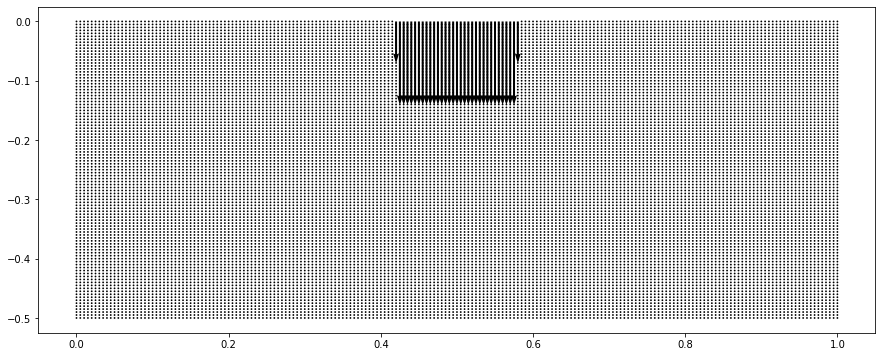

In [7]:
Nx = 201 #nodes in x
Nz = 101 #nodes in z

Lx = 1.0 #Horizontal size of the domain
Lz = 0.5 #Vertical size of the domain


xn = np.linspace(0,Lx,Nx)
zn = np.linspace(Lz,0,Nz)


x,z = np.meshgrid(xn,zn) #2D mesh


dx = Lx/(Nx-1)
dz = Lz/(Nz-1)

print("dx: %f, dz: %f"%(dx,dz))

#Velocity field (components vx and vz)
vz = x*0
vx = x*0
delta_x = 0.08

#punch at the surface 
cond = (z==0.0) & (x>=Lx/2-delta_x) & (x<=Lx/2+delta_x)
vz[cond] = -1.0

cond = (z==0.0) & ((x==Lx/2-delta_x) | (x==Lx/2+delta_x))
vz[cond] = -0.5
    
#construction of the velocity field
VX = np.reshape(vx,np.size(vx))
VZ = np.reshape(vz,np.size(vz))

v = np.zeros((2,Nx*Nz))

v[0,:]=VX
v[1,:]=VZ

v = np.reshape(v.T,(np.size(v)))


np.savetxt("input_velocity_0.txt",v,header="v1\nv2\nv3\nv4",fmt="%.4f")

plt.figure(figsize=(15,6))
plt.quiver(x,-z,vx,vz,scale=10)




In [8]:



vz = x*0 + 1
vx = x*0 + 1

delta_x = 0.08
cond = (z==0.0) & (x>=Lx/2-delta_x) & (x<=Lx/2+delta_x)
vz[cond] = 0.0
vx[cond] = 0.0

cond = (x==0) | (x==Lx) | (z==Lz)
vx[cond] = 0.0


cond = (z==Lz)
vz[cond] = 0.0


#construction of the velocity field
VX = np.reshape(vx,np.size(vx))
VZ = np.reshape(vz,np.size(vz))

v = np.zeros((2,Nx*Nz))

v[0,:]=VX
v[1,:]=VZ

v = np.reshape(v.T,(np.size(v)))


np.savetxt("bcv_0.txt",v,header="v1\nv2\nv3\nv4",fmt="%.4f")




In [9]:
params = f"""
nx                                  = {Nx}           # Number of elements in the longitudinal direction
nz                                  = {Nz}           # Number of elements in the vertical direction
lx                                  = {Lx}           # Extent in the longitudinal direction
lz                                  = {Lz}           # Extent in the vertical direction

# Simulation options
multigrid                           = 1
solver                              = direct        # default is direct [direct/iterative]
denok                               = 1.0E-10       # default is 1.0E-4
particles_per_element               = 600           # default is 81
particles_per_element_x             = 6             # Number of particles per element in longitudinal (default is 0)
particles_per_element_z             = 100           # Number of particles per element in vertical (default is 0)
particles_perturb_factor            = 0.7           # default is 0.5 [values are between 0 and 1]
rtol                                = 1.0E-7        # the absolute size of the residual norm (relevant only for iterative methods), default is 1.0E-5
RK4                                 = Euler         # default is Euler [Euler/Runge-Kutta]
Xi_min                              = 1.0E-13       # default is 1.0E-14
random_initial_strain               = 0.0           # default is 0.0
pressure_const                      = -1.0          # default is -1.0 (not used) - useful only in horizontal 2D models
initial_dynamic_range               = True         # default is False [True/False]
periodic_boundary                   = False         # default is False [True/False]
high_kappa_in_asthenosphere         = False         # default is False [True/False]
K_fluvial                           = 2.0E-7        # default is 2.0E-7
m_fluvial                           = 1.0           # default is 1.0
sea_level                           = 0.0           # default is 0.0
basal_heat                          = -1.0          # default is -1.0

# Surface processes
sp_surface_tracking                 = False          # default is False [True/False]
sp_surface_processes                = False         # default is False [True/False]
sp_mode                             = 0             # default is 1 [0/1/2]
sp_dt                               = 0             # default is 0.0
sp_d_c                              = 0.0           # default is 0.0
plot_sediment                       = False         # default is False [True/False]
a2l                                 = True          # default is True [True/False]

free_surface_stab                   = True          # default is True [True/False]
theta_FSSA                          = 0.5           # default is 0.5 (only relevant when free_surface_stab = True)

# Time constrains
step_max                            = 1             # Maximum time-step of the simulation
time_max                            = 130.0E6       # Maximum time of the simulation [years]
dt_max                              = 10.0E3        # Maximum time between steps of the simulation [years]
step_print                          = 1             # Make file every <step_print>


# Viscosity
viscosity_reference                 = 1.0E4        # Reference viscosity [Pa.s]
viscosity_max                       = 1.0E4        # Maximum viscosity [Pa.s]
viscosity_min                       = 1.0E-2        # Minimum viscosity [Pa.s]
viscosity_per_element               = constant      # default is variable [constant/variable]
viscosity_mean_method               = arithmetic    # default is harmonic [harmonic/arithmetic]
viscosity_dependence                = pressure      # default is depth [pressure/depth]

# External ASCII inputs/outputs
interfaces_from_ascii               = True          # default is False [True/False]
n_interfaces                        = 1             # Number of interfaces in the 'interfaces.txt' file
variable_bcv                        = False          # default is False [True/False]
bcv_extern                          = True
temperature_from_ascii              = False         # default is False [True/False]
velocity_from_ascii                 = True         # default is False [True/False]
binary_output                       = False         # default is False [True/False]
sticky_blanket_air                  = False         # default is False [True/False]
precipitation_profile_from_ascii    = False         # default is False [True/False]
climate_change_from_ascii           = False         # default is False [True/False]

print_step_files                    = True          # default is True [True/False]
checkered                           = False         # Print one element in the print_step_files (default is False [True/False])

geoq                                = on
geoq_fac                            = 1.0

# Physical parameters
temperature_difference              = 0.0
thermal_expansion_coefficient       = 3.28E-5
thermal_diffusivity_coefficient     = 1.0E-6
gravity_acceleration                = 0.0
density_mantle                      = 3300.0
external_heat                       = 0.0E-12
heat_capacity                       = 1250.0

non_linear_method                   = on
adiabatic_component                 = off
radiogenic_component                = off

# Velocity boundary conditions
top_normal_velocity                 = fixed
top_tangential_velocity             = free
bot_normal_velocity                 = fixed
bot_tangential_velocity             = free
left_normal_velocity                = fixed
left_tangential_velocity            = fixed
right_normal_velocity               = fixed
right_tangential_velocity           = fixed

surface_velocity                    = 0.0
multi_velocity                      = False         # default is False [True/False]

# Temperature boundary conditions
top_temperature                     = fixed
bot_temperature                     = fixed
left_temperature                    = fixed
right_temperature                   = fixed

rheology_model                      = 70
T_initial                           = 0"""

# Create the parameter file
with open("param.txt", "w") as f:
    for line in params.split("\n"):
        f.write(line + "\n")
        
#interfaces file

f = open("interfaces.txt","w")
f.write("C   1 1\n") 
f.write("rho 0. 0.\n")
f.write("H   0.0E-12 0.0E-12\n")
f.write("A   0 0\n")
f.write("n   0 0\n")
f.write("Q   0 0\n")
f.write("V   0 0\n")

for i in np.arange(Nx):
    f.write("%lf\n"%(0.0))

f.close()

## Run the model

You can run the model as:

```
mpirun -n NUMBER_OF_CORES mandyoc
```

You have to change NUMBER_OF_CORES.

## Post-processing

### Plot the results


Load the parameter file to generate the grid of the model:

In [10]:
with open("param.txt", "r") as f:
    line = f.readline()
    line = f.readline()
    line = line.split()
    Nx = int(line[2])
    line = f.readline()
    line = line.split()
    Nz = int(line[2])
    line = f.readline()
    line = line.split()
    Lx = float(line[2])
    line = f.readline()
    line = line.split()
    Lz = float(line[2])

print(
    "nx:", Nx, "\n",
    "nz:", Nz, "\n",
    "Lx:", Lx, "\n",
    "Lz:", Lz
)

nx: 201 
 nz: 101 
 Lx: 1.0 
 Lz: 0.5


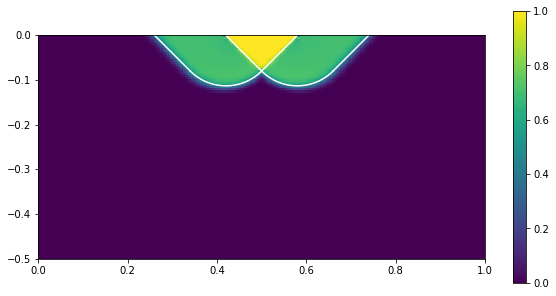

In [11]:
A = np.loadtxt("velocity_0.txt",unpack=True,comments="P",skiprows=2)
vx = A[0::2]
vz = A[1::2]

#absolute value of the velocity
vabs = np.sqrt(vx**2 + vz**2)
vabs = np.reshape(vabs,(Nx,Nz),order='F')


plt.figure(figsize=(10,5))
vabs = np.transpose(vabs)
plt.imshow(vabs[::-1],extent=(0,Lx,-Lz,0))#,cmap='RdBu_r')
plt.colorbar()


#curves from the analytical solution in white
analytical_punch("w")


plt.savefig("V_abs.png")

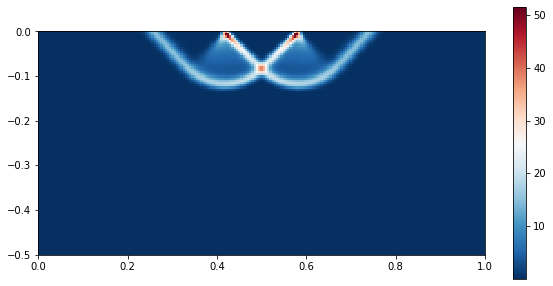

In [14]:
sr = np.loadtxt("strain_rate_0.txt",unpack=True,comments="P",skiprows=2)
sr = np.reshape(sr,(Nx,Nz),order='F')

plt.figure(figsize=(10,5))
sr = np.transpose(sr)
plt.imshow(sr[::-1],extent=(0,Lx,-Lz,0),cmap='RdBu_r')
plt.colorbar()

plt.savefig("strain_rate.png")
